In [1]:
# Packages: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import calplot
import plotly.express as px
import json
import requests
import datetime as dt

In [14]:
# Import data and determine focuscrimes
df = pd.read_csv ('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
# focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT',
#                    'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT'
#                    , 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focuscrimess = ['DRUNKENNESS']
# only data before 2018
df['Date'] = pd.to_datetime(df['Date'])
df = df.loc[(df['Date'] < '2018')]

In [18]:
# initializations
df = df[df['Category'].isin(focuscrimes)]
df['Weekday'] = df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month_name()
df['Time']=pd.to_datetime(df['Time'])
df['Hour']=df['Time'].dt.strftime('%H')
#df['Hour_of_week'] = df['Time'].dt.weekday * 24 + df['Time'].dt.hour
df['weekday_hour'] = df['DayOfWeek'] + ' ' + df['Time'].dt.strftime('%H')

In [20]:
crimes

{'ASSAULT',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'LARCENY/THEFT',
 'PROSTITUTION',
 'ROBBERY',
 'STOLEN PROPERTY',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WEAPON LAWS'}

In [21]:
focuscrimess

['DRUNKENNESS']

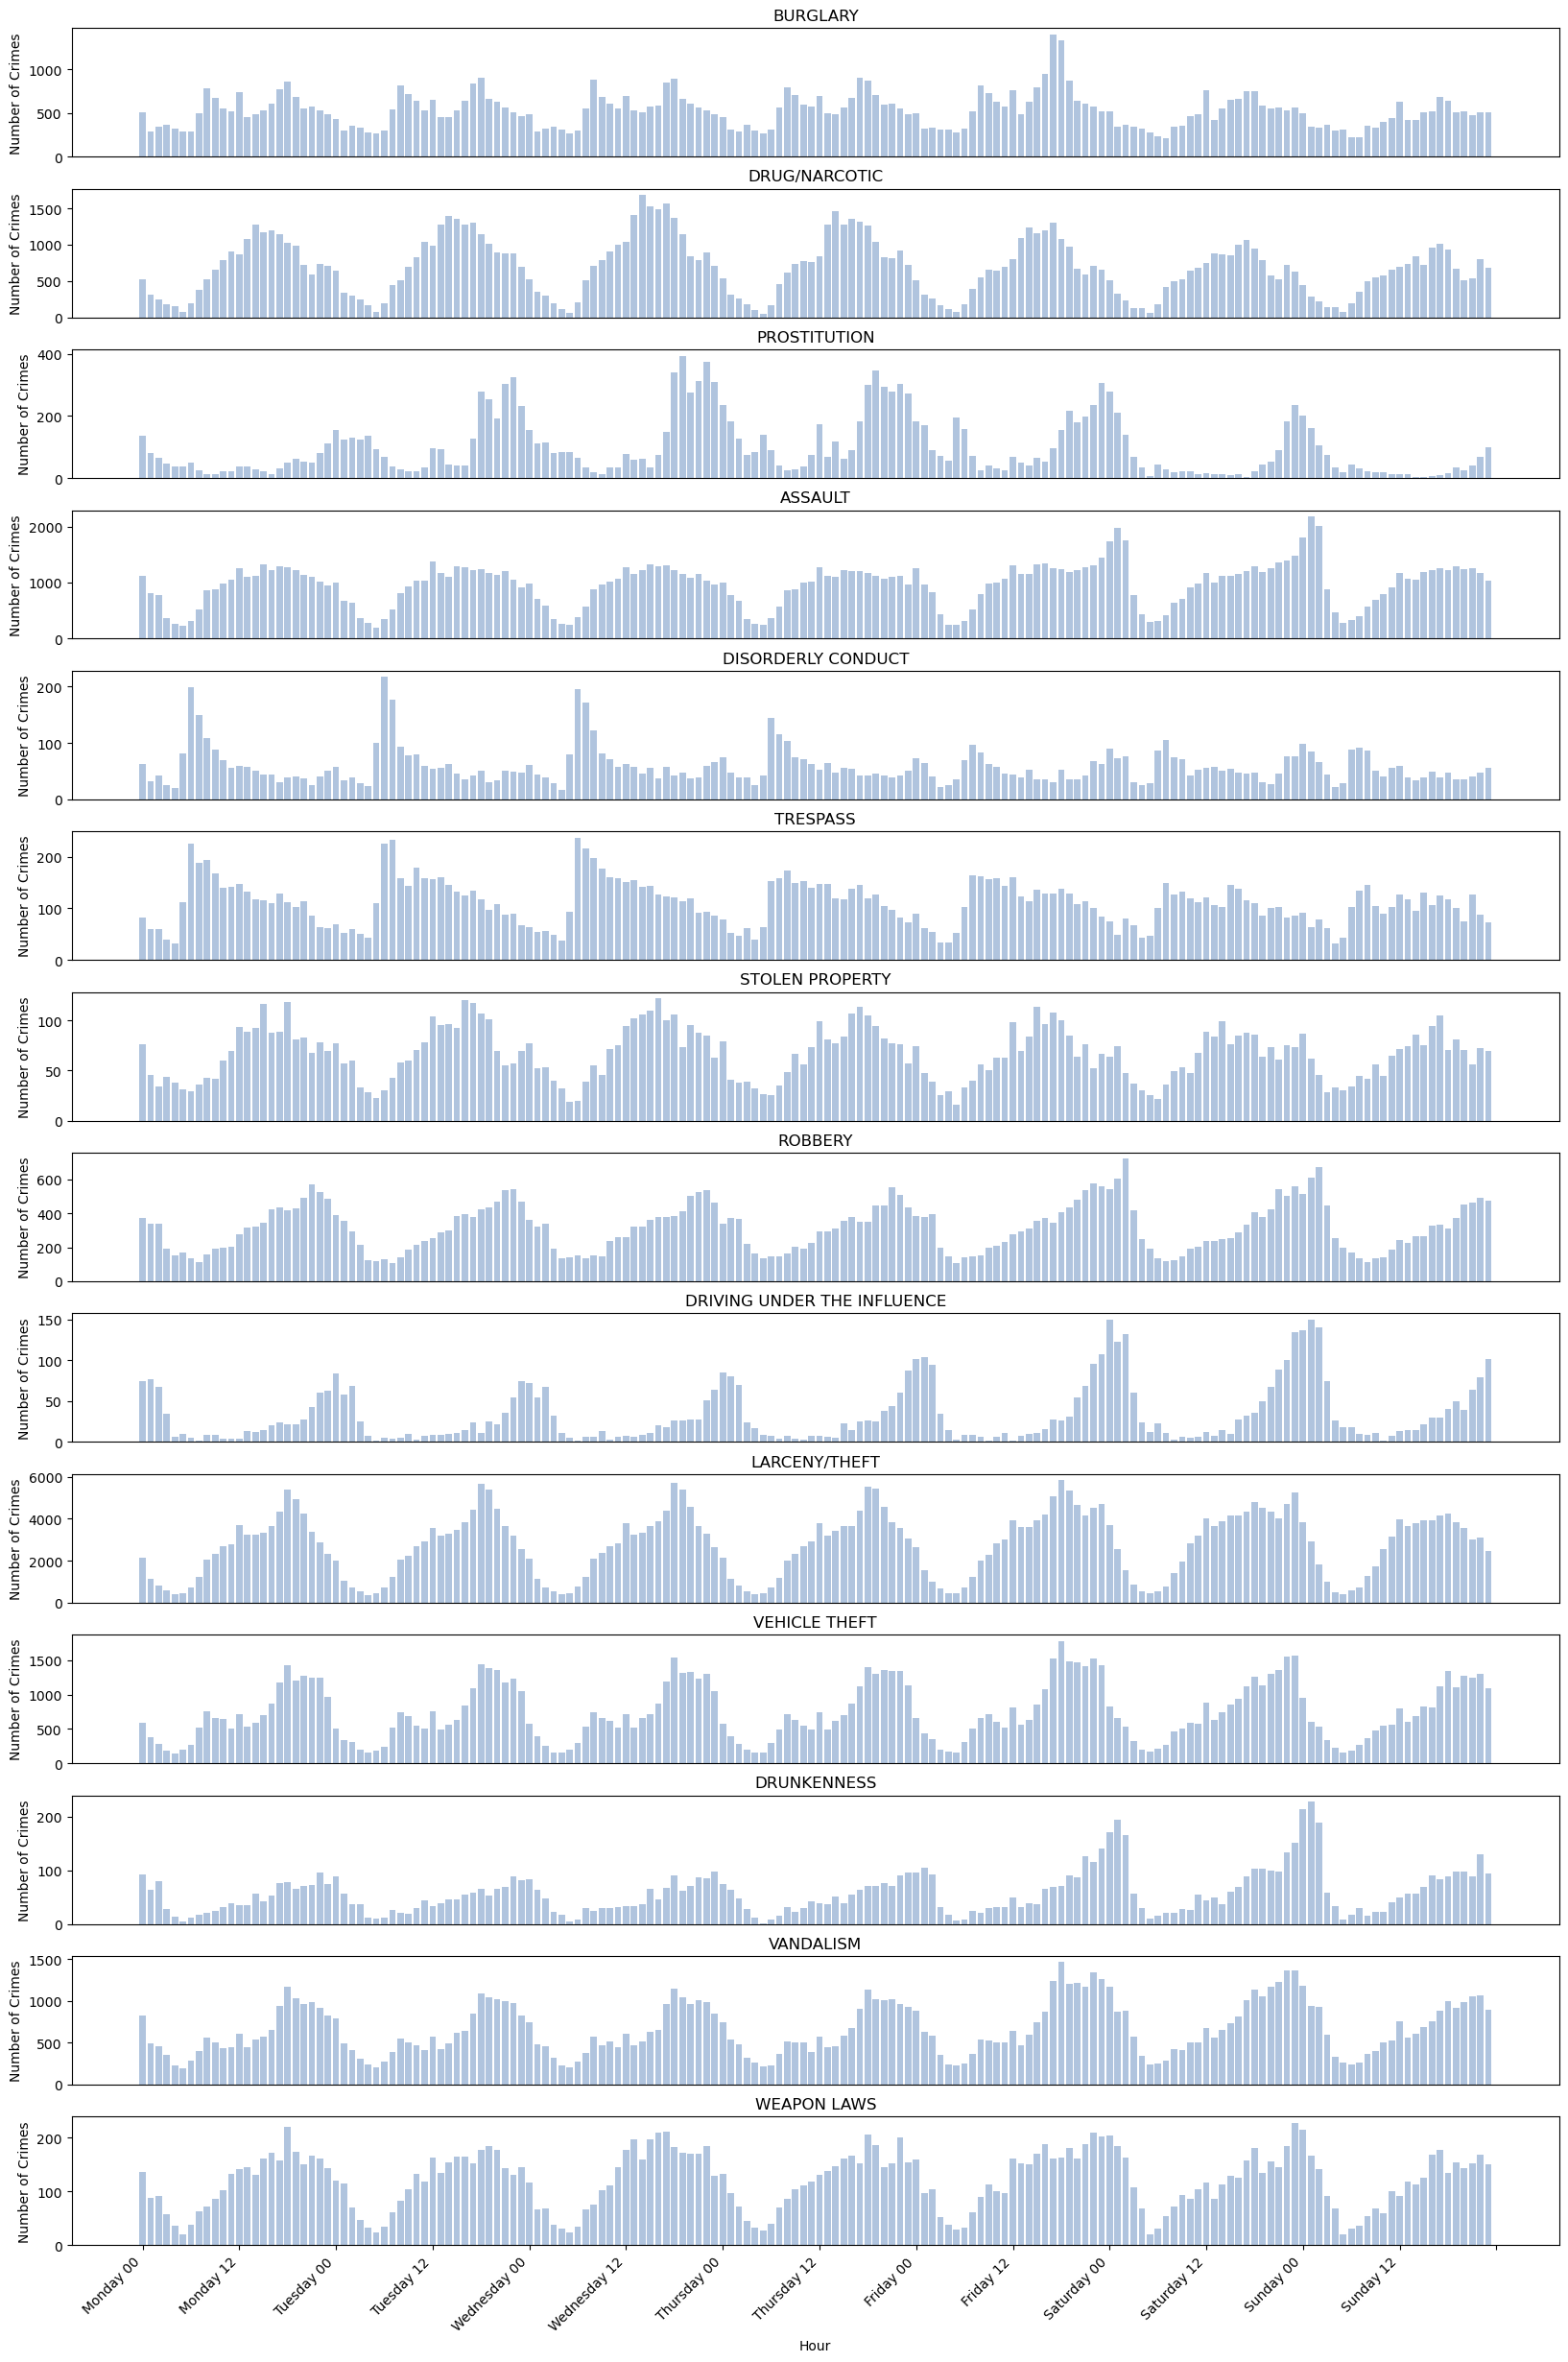

In [17]:
# 168hours

# define the list of crimes to plot
# crimes = focuscrimes
crimes = ['DRUNKENNESS']

# create a figure with subplots for each crime type
fig, axes = plt.subplots(nrows= 14, ncols= 1, figsize=(20, 30))
fig.subplots_adjust(hspace=0.25) 

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = [ '00', '01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
weekday_hour = []
for c in weekday_order:
    for h in hours:
        weekday_hour.append(c + ' ' + str(h))
    

# loop through the crimes and plot the data
for i, crime in enumerate(crimes):
    # create a Series of crime counts by day of the week
    crime_count = df[df['Category'] == crime]['weekday_hour'].value_counts()
    
    # create a DataFrame of crime counts with a single-level index of strings or bytes
    crime_data = pd.DataFrame({'Count': crime_count.values}, index=crime_count.index)
    crime_data = crime_data.reindex(weekday_hour)
    # create a bar plot
    ax = axes.flat[i]
    ax.bar(crime_data.index, crime_data['Count'], color = 'lightsteelblue')
    
    # set the title and labels for the subplot
    ax.set_title(f'{crime}')
    #ax.set_xlabel('Hour')
    ax.set_ylabel('Number of Crimes')
    
    if i == len(crimes) - 1:
        # set x-axis ticks for the bottom subplot
        ax.set_xticks([i for i in range(0, 170, 12)])
        ax.set_xlabel('Hour')
    else:
        # remove x-axis ticks and labels for all other subplots
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
    
# display the plot
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [8]:
# map



# Filter the data for Sunday thefts
df_car = df[df['Category'] == 'DRUNKENNESS']
# df_car = df_car[df_car['DayOfWeek'] == 'Sunday']

df_car = df_car.groupby(['PdDistrict'], as_index=False).count()

# Load the district boundaries
url = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson'
district_boundaries = json.loads(requests.get(url).text) 

# Create the choropleth map
fig = px.choropleth_mapbox(df_car, geojson=district_boundaries , locations='PdDistrict', color='PdId',
                           color_continuous_scale="Viridis",
                           range_color=(0, 2500),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.76164, "lon": -122.44457},
                           opacity=0.5,
                           labels={'PdId':'Number of drunkenness', 'PdDistrict': 'District'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [10]:
df_car = df[df['Category'] == 'DRUNKENNESS']

In [11]:
df_car

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
206,6119516519090,61195165,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Wednesday,2006-11-08,21:27,TENDERLOIN,"ARREST, BOOKED",...,18.0,1.0,18.0,6.0,2.0,1.0,1.0,1.0,NaN,20.0
392,6068638319090,60686383,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Wednesday,2006-06-28,18:10,MISSION,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,NaN,37.0
601,12050675419090,120506754,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Wednesday,2012-06-27,15:13,MISSION,"ARREST, BOOKED",...,14.0,3.0,14.0,NaN,2.0,NaN,NaN,3.0,50.0,53.0
905,9126354419090,91263544,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Thursday,2009-12-10,20:20,SOUTHERN,NONE,...,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,32.0
1233,5060263419090,50602634,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Monday,2005-05-30,10:47,SOUTHERN,"ARREST, BOOKED",...,3.0,1.0,3.0,7.0,2.0,1.0,1.0,1.0,35.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128142,17021158319090,170211583,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Tuesday,2017-03-14,18:30,TENDERLOIN,"ARREST, BOOKED",...,NaN,NaN,NaN,5.0,2.0,1.0,1.0,NaN,NaN,20.0
2128831,17094894619090,170948946,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Tuesday,2017-11-21,23:15,SOUTHERN,"ARREST, BOOKED",...,18.0,NaN,18.0,6.0,2.0,1.0,1.0,NaN,35.0,20.0
2128884,17081916519090,170819165,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Saturday,2017-10-07,14:00,INGLESIDE,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,83.0
2129172,17104888819090,171048888,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Friday,2017-12-29,02:50,MISSION,NONE,...,20.0,5.0,20.0,9.0,1.0,NaN,NaN,5.0,NaN,28.0
